**Background**

---


Cellular communications, especially with the advent of 5G mobile networks, demand stringent adherence to high-reliability standards, ultra-low latency, increased capacity, enhanced security, and high-speed user connectivity. To fulfill these requirements, mobile operators require a programmable solution capable of supporting multiple independent tenants on a single physical infrastructure. The advent of 5G networks facilitates end-to-end resource allocation through Network Slicing (NS), which allows for the division of the network into distinct virtual slices.

Network slicing in 5G is instrumental in provisioning tailored network services for specific use cases, ensuring optimal performance, resource utilization, and user experiences based on the requirements of eMBB, URLLC, and mMTC applications. This dataset is invaluable for researchers and practitioners aiming to design and implement ML models for network slice prediction, thereby enhancing the operational efficiency and reliability of 5G networks.

**Data Attributes (Columns Desc)**

---



* Device ID: Unique identifier for each device.
* Connection Type: Specifies the type of connection (e.g., LTE, 5G).
* Latency Requirements (ms): The maximum allowable latency for the device's operation.
* Bandwidth Requirements (Mbps): The bandwidth needed for optimal device performance.
* Reliability (%): The required reliability level for the device's connection.
* Data Rate (Mbps): The data rate the device can handle.
* Device Type: Categorizes the device (e.g., smartphone, IoT sensor).
* Mobility (Low/Medium/High): Indicates the mobility level of the device.
* Battery Life (hours): Expected battery life of the device.
* Application Type: The primary application for the device's connection (e.g., video streaming, industrial control).



In [8]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.17.0


In [9]:
df=pd.read_csv('./deepslice_data.csv')
# Drop the `Unnamed: 0` column
df = df.drop(columns=['Unnamed: 0'])

In [10]:
df.head()

,Use Case,LTE/5g Category,Technology Supported,Day,Time,GBR,Packet Loss Rate,Packet delay,slice Type
0,Smartphone,1,LTE/5G,sunday,1,Non-GBR,0.01,100,eMBB
1,Smartphone,1,LTE/5G,sunday,2,Non-GBR,0.01,100,eMBB
2,Smartphone,1,LTE/5G,sunday,3,Non-GBR,0.01,100,eMBB
3,Smartphone,1,LTE/5G,sunday,4,Non-GBR,0.01,100,eMBB
4,Smartphone,1,LTE/5G,sunday,5,Non-GBR,0.01,100,eMBB


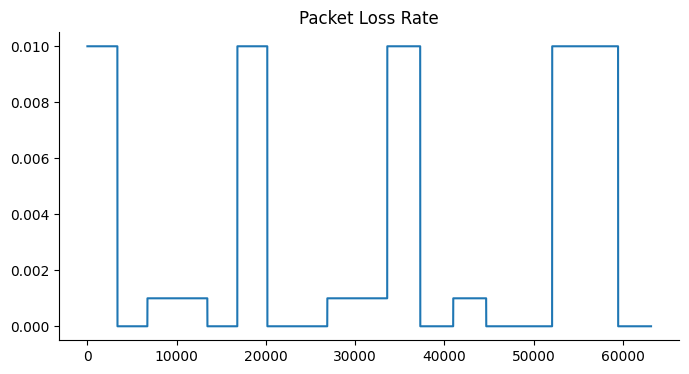

In [11]:
# @title Packet Loss Rate

from matplotlib import pyplot as plt
df['Packet Loss Rate'].plot(kind='line', figsize=(8, 4), title='Packet Loss Rate')
plt.gca().spines[['top', 'right']].set_visible(False)

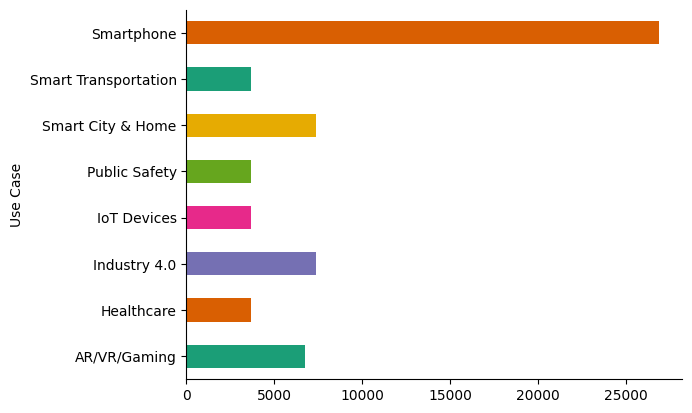

In [12]:
# @title Use Case

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Use Case').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [14]:
# List of categorical columns
cat_cols = ['Use Case', 'Technology Supported', 'Day', 'GBR']

# One-hot encode categorical columns
new_var = pd.get_dummies
df_encoded = new_var(df, columns=cat_cols )

# Separate features and target
X = df_encoded.drop('slice Type', axis=1)
y = df_encoded['slice Type']

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Display the first 5 rows of the encoded dataframe
print(df_encoded.head().to_markdown(index=False, numalign="left", stralign="left"))

| LTE/5g Category   | Time   | Packet Loss Rate   | Packet delay   | slice Type   | Use Case_AR/VR/Gaming   | Use Case_Healthcare   | Use Case_Industry 4.0   | Use Case_IoT Devices   | Use Case_Public Safety   | Use Case_Smart City & Home   | Use Case_Smart Transportation   | Use Case_Smartphone   | Technology Supported_IoT(LTE-M, NB-IoT)   | Technology Supported_LTE/5G   | Day_friday   | Day_monday   | Day_saturday   | Day_sunday   | Day_thrusday   | Day_tuesday   | Day_wednesday   | GBR_GBR   | GBR_Non-GBR   |
|:------------------|:-------|:-------------------|:---------------|:-------------|:------------------------|:----------------------|:------------------------|:-----------------------|:-------------------------|:-----------------------------|:--------------------------------|:----------------------|:------------------------------------------|:------------------------------|:-------------|:-------------|:---------------|:-------------|:---------------|:--------------|:----------

In [15]:
# Build the model
model = Sequential()

# Input layer with 64 neurons and 'relu' activation.
# The input_shape is determined by the number of features in your preprocessed data.
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))

# Hidden layers with 32 and 16 neurons respectively, also using 'relu' activation
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

# Output layer with number of neurons equal to the number of classes in 'slice Type'
# 'softmax' activation is used for multi-class classification
model.add(Dense(len(le.classes_), activation='softmax'))

# Compile the model
# 'sparse_categorical_crossentropy' is suitable when your target variable is integer encoded
# 'adam' is a popular optimizer
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
# 'epochs' is the number of times the model will see the entire training data
# 'validation_data' is used to evaluate the model after each epoch on unseen data
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))




D:\projects\5G_6G\env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1580/1580 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9682 - loss: 0.1014 - val_accuracy: 1.0000 - val_loss: 2.2538e-05
Epoch 2/5
1580/1580 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 1.0000 - loss: 1.5589e-05 - val_accuracy: 1.0000 - val_loss: 4.3782e-06
Epoch 3/5
1580/1580 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 1.0000 - loss: 3.3822e-06 - val_accuracy: 1.0000 - val_loss: 1.3548e-06
Epoch 4/5
1580/1580 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 1.0000 - loss: 1.0947e-06 - val_accuracy: 1.0000 - val_loss: 4.9003e-07
Epoch 5/5
1580/1580 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 1.0000 - loss: 4.0241e-07 - val_accuracy: 1.0000 - val_loss: 1.8814e-07


In [16]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f'Test accuracy: {test_acc}')

395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 1.9012e-07
Test accuracy: 1.0
